In [3]:
import seaborn as sns
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import missingno as msno
from numpy import nansum
from numpy import nanmean
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [4]:
main = pd.read_csv("main.csv")
mainByMonth = pd.read_csv("mainByMonth.csv")
mainByYear = pd.read_csv("mainByYear.csv")


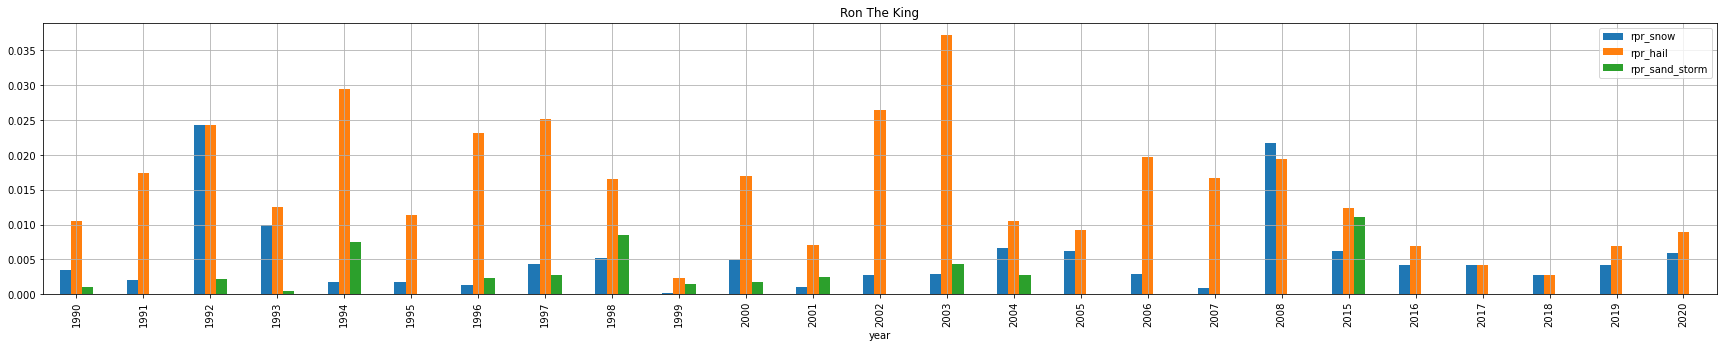

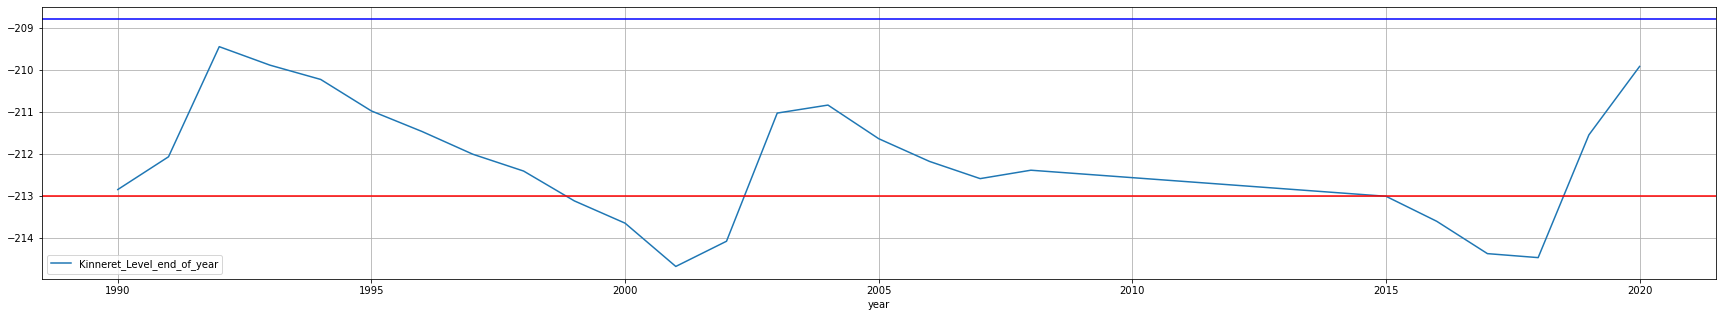

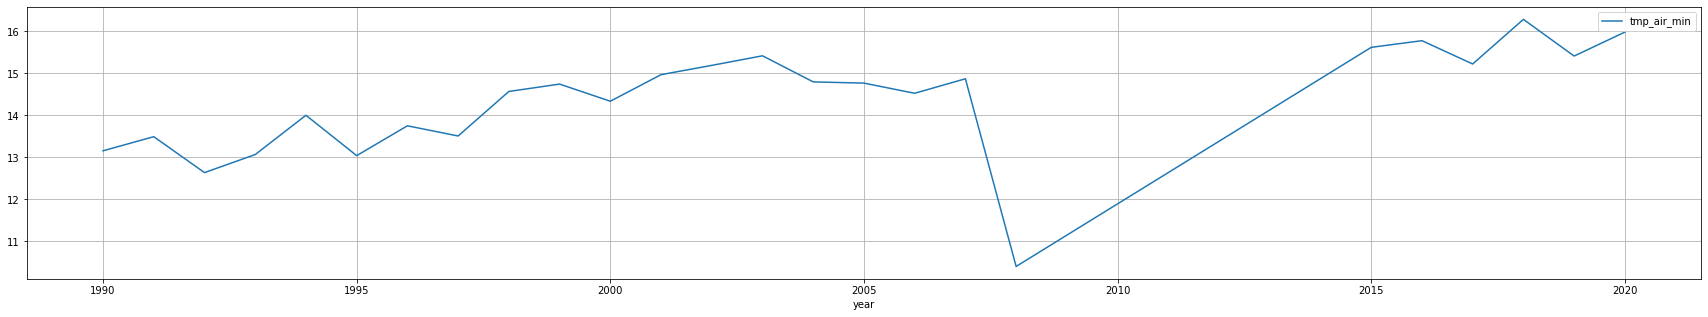

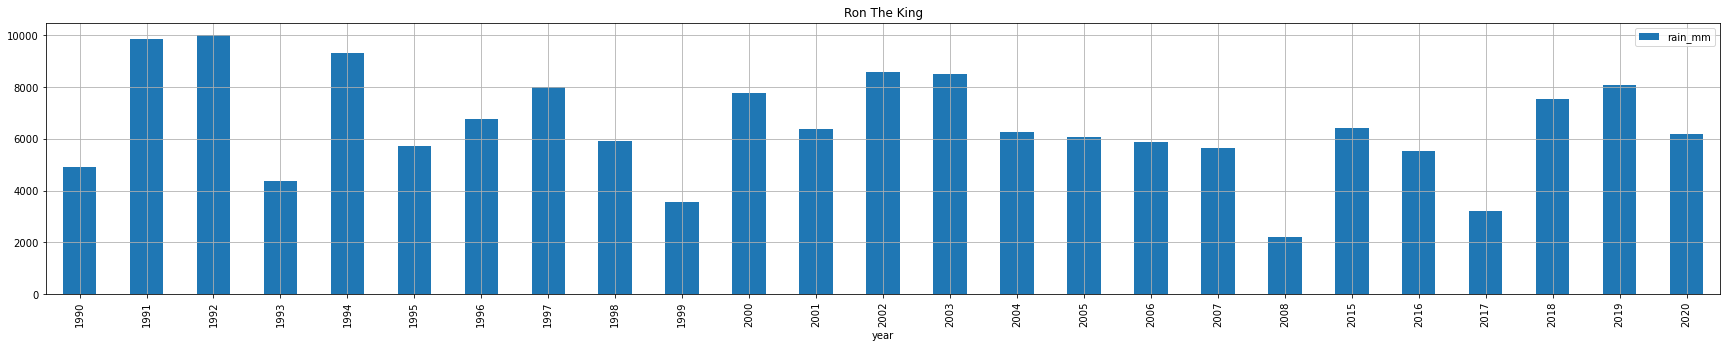

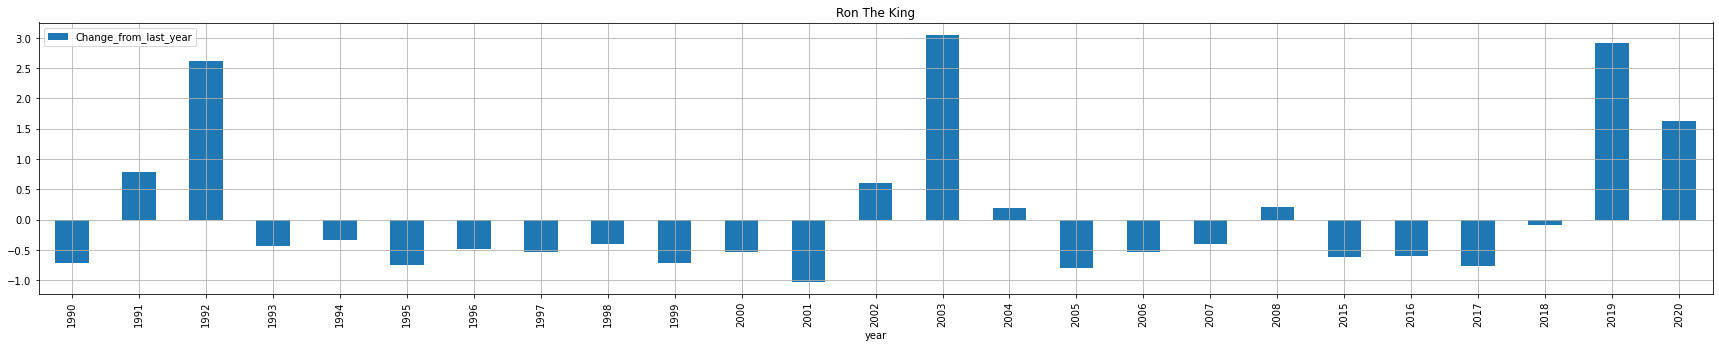

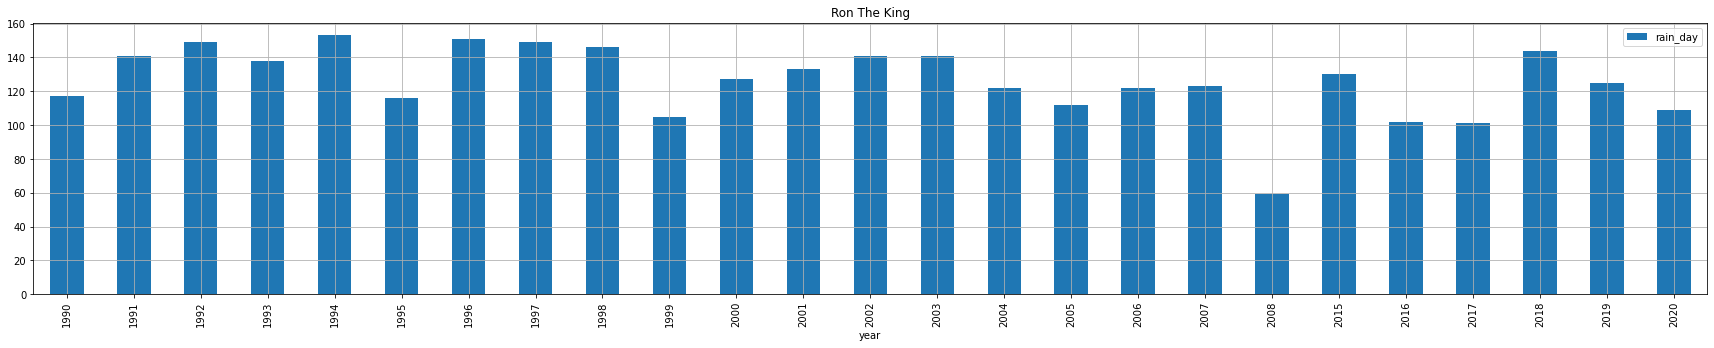

In [5]:
yearStart=1990
yearEnd=2020
mainByYear[(mainByYear['year']>=yearStart)&(mainByYear['year']<=yearEnd)].plot(
    kind='bar',
    x='year',
    y=['rpr_snow', 'rpr_hail', 'rpr_sand_storm'],
    title='Ron The King',
    figsize=(30, 5),
    grid=True
)
mainByYear[(mainByYear['year']>=yearStart)&(mainByYear['year']<=yearEnd)].plot(
    x='year',
    y=["Kinneret_Level_end_of_year"],
    figsize=(30, 5),
    grid=True
)
plt.axhline(y=-208.80, color='b', linestyle='-')
plt.axhline(y=-213.00, color='r', linestyle='-')
plt.show()

mainByYear[(mainByYear['year']>=yearStart)&(mainByYear['year']<=yearEnd)].plot(
    x='year',
    y=['tmp_air_min'],
    figsize=(30, 5),
    grid=True
)

mainByYear[(mainByYear['year']>=yearStart)&(mainByYear['year']<=yearEnd)].plot(
    kind='bar',
    x='year',
    y=['rain_mm'],
    title='Ron The King',
    figsize=(30, 5),
    grid=True
)
mainByYear[(mainByYear['year']>=yearStart)&(mainByYear['year']<=yearEnd)].plot(
    kind='bar',
    x='year',
    y=['Change_from_last_year'],
    title='Ron The King',
    figsize=(30, 5),
    grid=True
)
mainByYear[(mainByYear['year']>=yearStart)&(mainByYear['year']<=yearEnd)].plot(
    kind='bar',
    x='year',
    y=['rain_day'],
    title='Ron The King',
    figsize=(30, 5),
    grid=True
)


Text(0, 0.5, 'תרניכה סלפמב םייוניש')

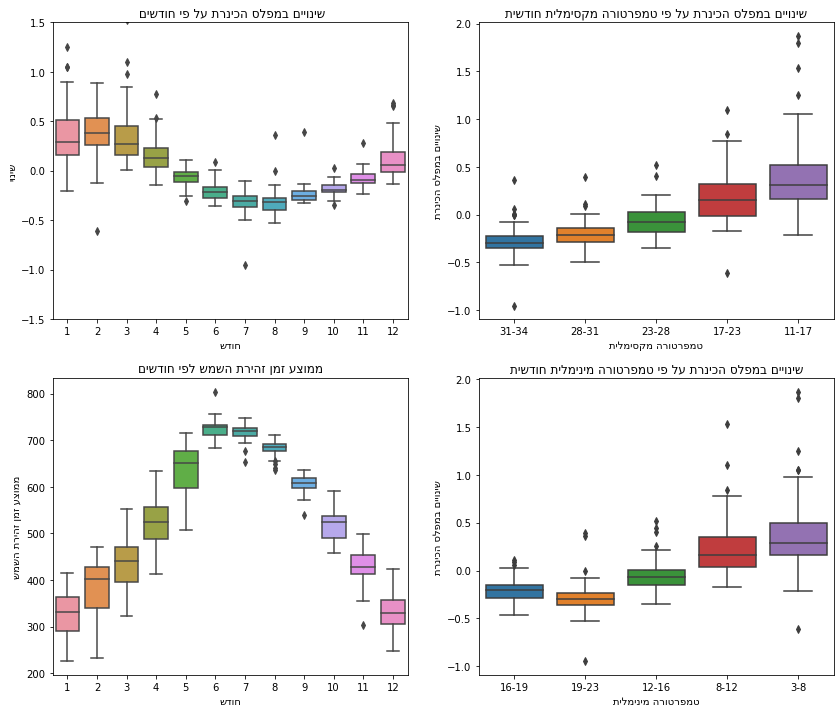

In [6]:
#Multiplotting
plt.figure(1,figsize=[14,12])

#Subplot 1
plt.subplot(2,2,1)
sns.boxplot(data=mainByMonth,y="Change_from_last_month",x="month")
plt.title(" םישדוח יפ לע תרניכה סלפמב םייוניש")
plt.xlabel("שדוח")
plt.ylabel("יוניש")
plt.ylim([-1.5,1.5])

#Subplot 2
plt.subplot(2,2,2)
sns.boxplot(data=mainByMonth,y="Change_from_last_month",x="tmp_air_max_binned")
plt.title("תישדוח תילמיסקמ הרוטרפמט יפ לע תרניכה סלפמב םייוניש")
plt.xlabel("תילמיסקמ הרוטרפמט")
plt.ylabel("תרניכה סלפמב םייוניש")

#Subplot 3
plt.subplot(2,2,3)
sns.boxplot(data=mainByMonth,y="sns_drt",x="month")
plt.title("םישדוח יפל שמשה תריהז ןמז עצוממ")
plt.xlabel("שדוח")
plt.ylabel("שמשה תריהז ןמז עצוממ")

#Subplot 4
plt.subplot(2,2,4)
sns.boxplot(data=mainByMonth,y="Change_from_last_month",x="tmp_air_min_binned")
plt.title("תישדוח תילמינימ הרוטרפמט יפ לע תרניכה סלפמב םייוניש")
plt.xlabel("תילמינימ הרוטרפמט")
plt.ylabel("תרניכה סלפמב םייוניש")

(-1.5, 1.5)

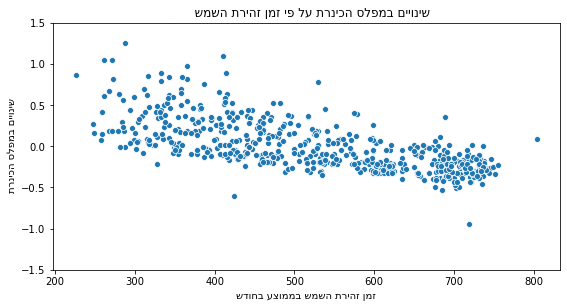

In [7]:
plt.figure(1,figsize=[20,10])

plt.subplot(2,2,2)
sns.scatterplot(data=mainByMonth, x=mainByMonth['sns_drt'],y=mainByMonth['Change_from_last_month'])

plt.title("   שמשה תריהז ןמז יפ לע תרניכה סלפמב םייוניש")
plt.xlabel("שדוחב עצוממב שמשה תריהז ןמז")
plt.ylabel(" תרניכה סלפמב םייוניש")
plt.ylim([-1.5,1.5])


(-1.5, 1.5)

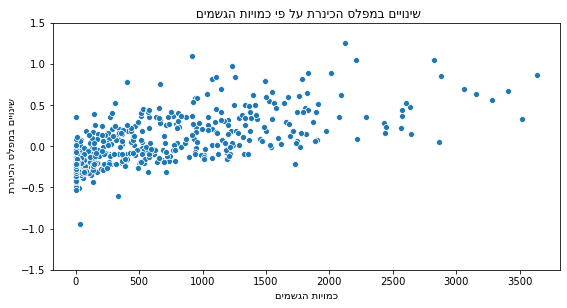

In [8]:
plt.figure(1,figsize=[20,10])
plt.subplot(2,2,2)
sns.scatterplot(data=mainByMonth, x=mainByMonth['rain_mm'],y=mainByMonth['Change_from_last_month'])
plt.title(" םימשגה תויומכ יפ לע תרניכה סלפמב םייוניש")
plt.xlabel("םימשגה תויומכ")
plt.ylabel(" תרניכה סלפמב םייוניש")
plt.ylim([-1.5,1.5])


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

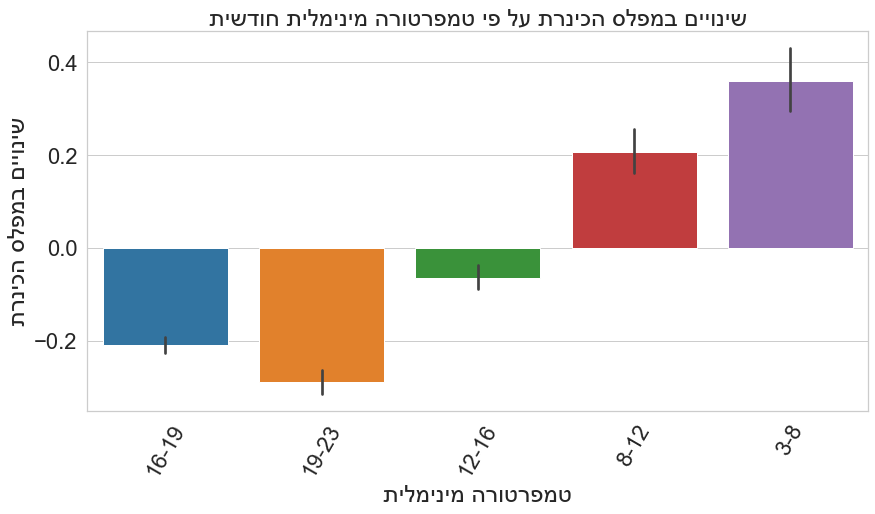

In [9]:
# Generate plot of percentage of wet commutes
plt.figure(figsize=(14,7))
sns.set_style("whitegrid")    # Set style for seaborn output
sns.set_context("notebook", font_scale=2)
sns.barplot(data=mainByMonth,y="Change_from_last_month",x="tmp_air_min_binned")

plt.title("תישדוח תילמינימ הרוטרפמט יפ לע תרניכה סלפמב םייוניש")
plt.xlabel("תילמינימ הרוטרפמט")
plt.ylabel("תרניכה סלפמב םייוניש")
plt.xticks(rotation=60)


Text(0, 0.5, 'עצוממה שמשה תריהז ןמז')

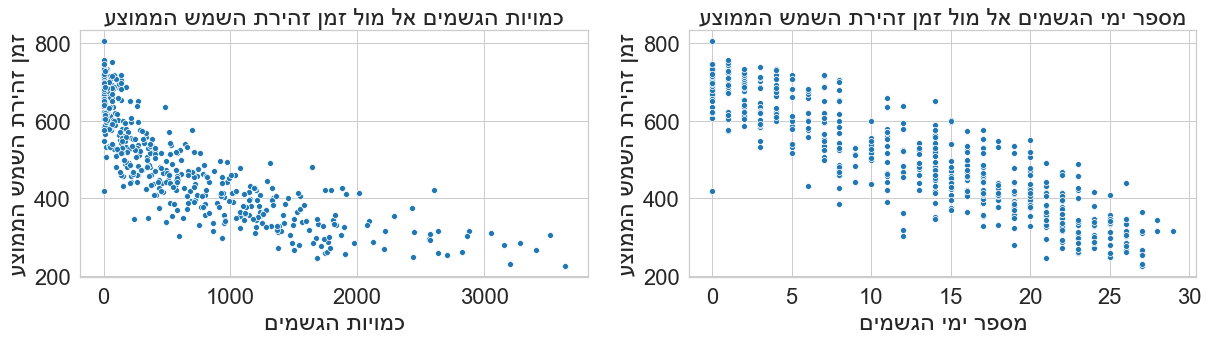

In [29]:
plt.figure(1,figsize=[20,10])
plt.subplot(2,2,1)
sns.scatterplot(data=mainByMonth, x='rain_mm',y='sns_drt')
plt.title("עצוממה שמשה תריהז ןמז לומ לא םימשגה תויומכ")
plt.xlabel("םימשגה תויומכ")
plt.ylabel("עצוממה שמשה תריהז ןמז")

plt.figure(1,figsize=[20,10])
plt.subplot(2,2,2)
sns.scatterplot(data=mainByMonth, x='rain_day',y='sns_drt')
plt.title("עצוממה שמשה תריהז ןמז לומ לא םימשגה ימי רפסמ")
plt.xlabel("םימשגה ימי רפסמ")
plt.ylabel("עצוממה שמשה תריהז ןמז")


Text(0, 0.5, 'עצוממה שמשה תריהז ןמז')

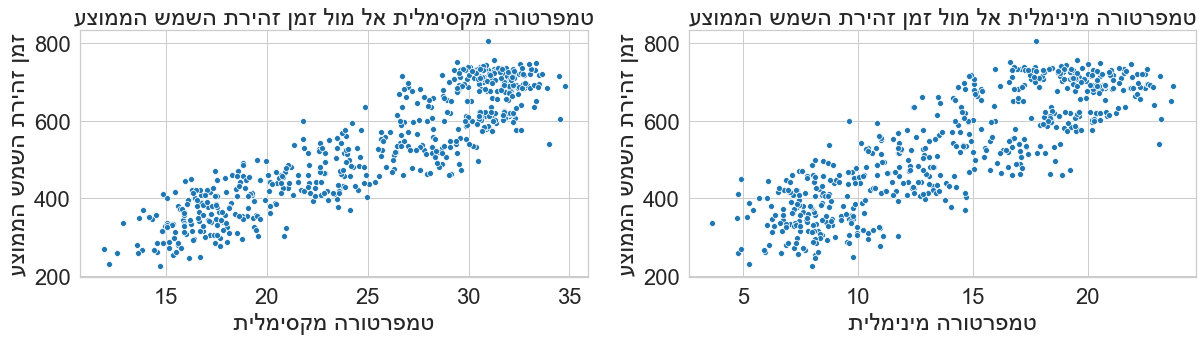

In [31]:
plt.figure(1,figsize=[20,10])
plt.subplot(2,2,1)
sns.scatterplot(data=mainByMonth, x='tmp_air_max',y='sns_drt')
plt.title("עצוממה שמשה תריהז ןמז לומ לא תילמיסקמ הרוטרפמט")
plt.xlabel("תילמיסקמ הרוטרפמט")
plt.ylabel("עצוממה שמשה תריהז ןמז")

plt.figure(1,figsize=[20,10])
plt.subplot(2,2,2)
sns.scatterplot(data=mainByMonth, x='tmp_air_min',y='sns_drt')
plt.title("עצוממה שמשה תריהז ןמז לומ לא תילמינימ הרוטרפמט")
plt.xlabel("תילמינימ הרוטרפמט")
plt.ylabel("עצוממה שמשה תריהז ןמז")
